# affNIST Classification with Neural Networks


## Setup
### Import all necessary libraries and define constants.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import MyDataClass
from models import Layer_Dense, Activation_ReLU, Activation_Softmax, Loss_CategoricalCrossentropy, Accuracy_Categorical, Optimizer_Adam, Model
from sklearn.metrics import classification_report


## Data Preprocessing
### Load and preprocess the affNIST data.

In [2]:
data = MyDataClass()

data.load_and_preprocess_affnist('data/processed/affnist')

## Model Building
### Define and compile the neural network model.


In [3]:
model = Model()

model.add(Layer_Dense(1600, 128)) 
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10)) 
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=1e-3, decay=1e-5),
    accuracy=Accuracy_Categorical()
)

model.finalize()


## Training
### Train the model with the affNIST dataset.


In [4]:
model.train(data.X_train, data.y_train, validation_data=(data.X_test, data.y_test), epochs=10, batch_size=128, print_every=1)


epoch: 1
step: 0, acc: 0.141, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 1, acc: 0.094, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.0009999900000999989
step: 2, acc: 0.203, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.0009999800003999922
step: 3, acc: 0.180, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.000999970000899973
step: 4, acc: 0.117, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.000999960001599936
step: 5, acc: 0.125, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.000999950002499875
step: 6, acc: 0.117, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.000999940003599784
step: 7, acc: 0.109, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.000999930004899657
step: 8, acc: 0.125, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.000999920006399488
step: 9, acc: 0.109, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.0009999100080992712
step: 10, acc: 0.109, loss: 2.302 (data_loss: 2.302, 

## Classification report

In [5]:
y_pred = model.predict(data.X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = data.y_test

report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.87      0.89      1032
           3       0.90      0.89      0.89      1010
           4       0.91      0.92      0.91       982
           5       0.87      0.87      0.87       892
           6       0.92      0.94      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.86      0.87      0.87       974
           9       0.89      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


## Learning Curves
### Plot the learning curves to evaluate the training process.


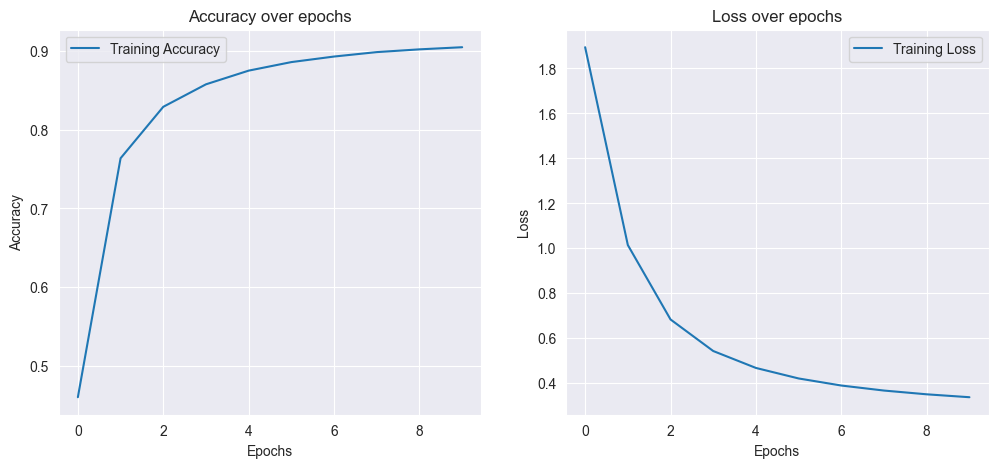

In [6]:
def plot_learning_curves(model):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(model.train_acc_history, label='Training Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(model.train_loss_history, label='Training Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_learning_curves(model)


## Latent features visualization

In [7]:
example_indices = np.random.choice(range(len(data.X_test)), 10)
examples = data.X_test[example_indices]

activations = model.get_activations(examples)


TypeError: Layer_Dense.forward() missing 1 required positional argument: 'training'

In [ ]:
import seaborn as sns

for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 1))
    sns.heatmap(activation, cmap="viridis", yticklabels=False)
    plt.title(f"Layer {i+1} Activation")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

weights = model.get_weights()
biases = model.get_biases()

num_layers = len(weights)

fig, axes = plt.subplots(num_layers, 2, figsize=(12, num_layers * 4))

for i in range(num_layers):
    ax = axes[i, 0]
    sns.heatmap(weights[i], ax=ax, cmap="viridis")
    ax.set_title(f'Layer {i+1} Weights')

    ax = axes[i, 1]
    sns.heatmap(biases[i].reshape(1, -1), ax=ax, cmap="viridis")
    ax.set_title(f'Layer {i+1} Biases')

plt.tight_layout()
plt.show()

## Hyperparameter search using grid search

In [ ]:
learning_rates = [1e-2, 1e-3, 1e-4]
batch_sizes = [32, 64, 128]
epochs_options = [5, 10, 20]

best_hyperparams = None
best_accuracy = 0

for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        for epochs in epochs_options:

            model = Model()
            model.add(Layer_Dense(1600, 128)) 
            model.add(Activation_ReLU())
            model.add(Layer_Dense(128, 10)) 
            model.add(Activation_Softmax())
            model.set(
                loss=Loss_CategoricalCrossentropy(),
                optimizer=Optimizer_Adam(learning_rate=learning_rate),
                accuracy=Accuracy_Categorical()
            )
            model.finalize()

            model.train(data.X_train, data.y_train, validation_data=(data.X_test, data.y_test), epochs=epochs, batch_size=batch_size)

            validation_loss, validation_accuracy = model.evaluate(data.X_test, data.y_test)

            if validation_accuracy > best_accuracy:
                best_accuracy = validation_accuracy
                best_hyperparams = {'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

print("Best Hyperparameters:")
print(best_hyperparams)

## Measuring impact of neural network dimensionality

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 5

layer_options = [1, 2, 3]
layer_results = []

for num_layers in layer_options:
    model = Model()

    model.add(Layer_Dense(1600, 32)) 
    model.add(Activation_ReLU())

    for _ in range(num_layers - 1):
        model.add(Layer_Dense(32, 32)) 
        model.add(Activation_ReLU())

    model.add(Layer_Dense(32, 10)) 
    model.add(Activation_Softmax())

    model.set(
        loss=Loss_CategoricalCrossentropy(),
        optimizer=Optimizer_Adam(learning_rate=learning_rate),
        accuracy=Accuracy_Categorical()
    )
    model.finalize()

    model.train(data.X_train, data.y_train, validation_data=(data.X_test, data.y_test), epochs=epochs, batch_size=batch_size)

    validation_loss, validation_accuracy = model.evaluate(data.X_test, data.y_test)

    layer_results.append({
        'num_layers': num_layers,
        'loss': validation_loss,
        'accuracy': validation_accuracy
    })

In [ ]:
num_layers_list = [result['num_layers'] for result in layer_results]
losses = [result['loss'] for result in layer_results]
accuracies = [result['accuracy'] for result in layer_results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_layers_list, losses, marker='o')
plt.title('Validation Loss vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_layers_list, accuracies, marker='o')
plt.title('Validation Accuracy vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()